# Notebooks General
## Jupyter Notebooks

From [TalkPython: Awesome Jupyter Libraries and Extensions](https://talkpython.fm/episodes/show/394/awesome-jupyter-libraries-and-extensions-in-2022)

> Jupyter is an amazing environment for exploring data and generating executable reports with Python. But there are many external tools, extensions, and libraries to make it so much better and make you more productive. 

- A notebook consists of two parts
    - markdown part where we can:
        - write text, add images, links, html, LaTeX etc
    - code part which runs and displays output of code

Some links:

- [Jupyter Book](https://jupyterbook.org/en/stable/intro.html)
- [A curated list of awesome Jupyter projects](https://github.com/markusschanta/awesome-jupyter)
- [Code Documentation QA of Code](https://best-practice-and-impact.github.io/qa-of-code-guidance/code_documentation.html#generating-html-documentation)
- [FastAI guide for better blogs](https://www.fast.ai/posts/2019-05-13-blogging-advice.html)


## Example of a notebook
 
An example notebook

![](ghtop_images/jupyter.png)




# Notebooks Markdown and Code
## Markdown in a notebook


Some useful commands:

1. `# Notebooks Markdown and Code` and `## Markdown in a notebook` 

2. `![](ghtop_images/pest.png)` looks like this

![](ghtop_images/pest.png)

3. And the same with a mp4 file `![](ghtop_images/revealjs.mp4)`

![](ghtop_images/revealjs.mp4)

4. `> If we want text like this`

> If we want text like this

5. Or if we want code use \`a = b + c\` 

or:

\```

a = b

a = a + c

\```

`a = b + c`

6. HTML works too

```
<img src="ghtop_images/pest.png"></img>
```
<img src="ghtop_images/pest.png"></img>

## Code in a notebook

Example interactive format using altair:

In [1]:
import altair as alt
from vega_datasets import data

movies = alt.UrlData(
    data.movies.url,
    format=alt.DataFormat(parse={"Release_Date":"date"})
)
ratings = ['G', 'NC-17', 'PG', 'PG-13', 'R']
genres = ['Action', 'Adventure', 'Black Comedy', 'Comedy',
       'Concert/Performance', 'Documentary', 'Drama', 'Horror', 'Musical',
       'Romantic Comedy', 'Thriller/Suspense', 'Western']

base = alt.Chart(movies, width=200, height=200).mark_point(filled=True).transform_calculate(
    Rounded_IMDB_Rating = "floor(datum.IMDB_Rating)",
    Hundred_Million_Production =  "datum.Production_Budget > 100000000.0 ? 100 : 10",
    Release_Year = "year(datum.Release_Date)"
).transform_filter(
    alt.datum.IMDB_Rating > 0
).transform_filter(
    alt.FieldOneOfPredicate(field='MPAA_Rating', oneOf=ratings)
).encode(
    x=alt.X('Worldwide_Gross:Q', scale=alt.Scale(domain=(100000,10**9), clamp=True)),
    y='IMDB_Rating:Q',
    tooltip="Title:N"
)

# A slider filter
year_slider = alt.binding_range(min=1969, max=2018, step=1)
slider_selection = alt.selection_single(bind=year_slider, fields=['Release_Year'], name="Release Year_")


filter_year = base.add_selection(
    slider_selection
).transform_filter(
    slider_selection
).properties(title="Slider Filtering")

# A dropdown filter
genre_dropdown = alt.binding_select(options=genres)
genre_select = alt.selection_single(fields=['Major_Genre'], bind=genre_dropdown, name="Genre")

filter_genres = base.add_selection(
    genre_select
).transform_filter(
    genre_select
).properties(title="Dropdown Filtering")

#color changing marks
rating_radio = alt.binding_radio(options=ratings)

rating_select = alt.selection_single(fields=['MPAA_Rating'], bind=rating_radio, name="Rating")
rating_color_condition = alt.condition(rating_select,
                      alt.Color('MPAA_Rating:N', legend=None),
                      alt.value('lightgray'))

highlight_ratings = base.add_selection(
    rating_select
).encode(
    color=rating_color_condition
).properties(title="Radio Button Highlighting")

# Boolean selection for format changes
input_checkbox = alt.binding_checkbox()
checkbox_selection = alt.selection_single(bind=input_checkbox, name="Big Budget Films")

size_checkbox_condition = alt.condition(checkbox_selection,
                                        alt.SizeValue(25),
                                        alt.Size('Hundred_Million_Production:Q')
                                       )

budget_sizing = base.add_selection(
    checkbox_selection
).encode(
    size=size_checkbox_condition
).properties(title="Checkbox Formatting")

( filter_year | filter_genres) &  (highlight_ratings | budget_sizing  )

alt.VConcatChart(...)

## Simpler code output

```
x = np.arange(0,np.pi,.01)
y = np.sin(x)
plt.plot(x,y)
```

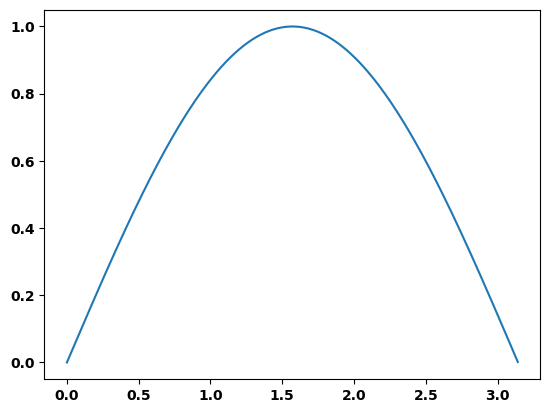

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,np.pi,.01)
y = np.sin(x)
plt.plot(x,y)

# Notebooks Opinion

## Notebooks: my view

Although notebooks have their *validish* detractors [I don't like notebooks.- Joel Grus Youtube](https://www.youtube.com/watch?v=7jiPeIFXb6U) I think if you approach them in the right way they are a super powerful tool.

The negatives seem to be:

- encourage bad practice in code (a genuine problem)
- issues around order of what cell is run (easily got around with good practice)
- issues around lack of auto complete (I don't see the issue, use in visual studio autocomplete is there)
- no grammar/spelling correction
- issues with using git and version control 
    - there are ways around this though




## Notebook Benefits

- Notebooks are **intuitive**
    - You have the code then the result of the code
    - Plus can add details of how code works
    - And it's linear
- Can get things up and working **quickly**
- Aid with communicating code
- Encourages **Writing** 
    - and writing things down aids thinking in the now and understanding what you did and why in the future  
    - [FastAI guide for better blogs](https://www.fast.ai/posts/2019-05-13-blogging-advice.html)
- Can use shell commands e.g. `!pip install pandas`
- Can use [magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html) e.g. `%%time` to time a cell
- Easy to convert code to a pipeline

With many companies moving towards Python/R from Excel and a varied level of skills. The first of these is particularly important to aid communicating code

## Communicating when code is a large element of what is being presented

- Microsoft Word/ppt- type methods aren't set-up well to include code
- Programming files (e.g. `.py`) aren't set-up well to share
- Videoing code with outputs is an option, but don't translate to other formats (i.e. we may also need to do a written format of this)
- Apps (e.g. streamlit) can be good. 
    - But the code is hidden
- Programming notebooks (e.g.`.ipynb`) offer a good and easy to share code but with some limitations
 
An easier way is to convert the notebooks to html

- e.g. maybe someone doesn't have python installed 






# Example Useage


## Example: Documenting Code

- [Here](https://thomashsimm.github.io/PesticideDocs/UK_areas.html) is my website for my research project on pesticides in UK food.

- This is not the same as documentation for a package but there are parallels 

This does a few things:

- Documents the analysis steps I have taken including the code and outputs
    - Useful for data transparency, useability of the code if needs modifiying/adapting, and why I did XYZ
- Provides a way to present the data
    - There is a streamlit app, but sometimes I like to be able to see the code

![](ghtop_images/pest.png)


## Example: Tool to aid learning

A big area I have been using Jupyter Notebooks for is to aid learning

- If you want to understand something it helps to write it down
- Having the code next to it is a big advantage
- And if stored on github you can access it anywhere

[Tensoflow cheat sheet](https://thomashsimm.com/tensorflow/2022/09/28/Tensorflow.html)
![](ghtop_images/tflow.png)

## Example: Debugging Code

- Since starting at ONS I have been working with understanding an existing project and latterly adding code to it
- The project consists of multiple python files across several folders
    - My Python was good but lots of the functions and their useage weren't immediately obvious to me 
- **break-points** in VS Studio is really good to step through the code and work out what happens in the code.
    - I had not used before with Python (but had lots with MATLAB), and it's really useful
- But it can be limited what you can do
    - difficult to probe code if want to write more than 1 line of code
    - the experience/knowledge exists as you go through it but no documentation to refer to later, e.g. function X does this when I give it Y etc
- By copying and pasting code into Jupyter cells I could see and document how they worked (e.g. changing inputs)
    - This (copying and pasting) would get around code changes too (which would be an issue if modules were just imported)
    - because this was all done in Jupyter notebook I can have a ipynb code file and a html file showing how the code works
    - I could even save a pickle file of the variables at a particularly point to understand how the code would work from this point
 
